# Covid Symptom Identification

Project developed by:

- Ana Teresa Cruz (up201806460)
- André Nascimento (up201806461)
- António Bezerra (up201806854)


## Table of Contents

1. [Specification](#Specification)
2. [Related work](#Related-work)
3. [Approach](#Approach)
4. [Required libraries](#Required-libraries)
5. [Data analysis](#Data-analysis)
6. [Data preprocessing](#Data-preprocessing)
7. [Classification](#Classification)
    1. [Decision tree classifier](#Decision-Tree-Classifier)
    2. [K-Nearest Neighbors](#K-Nearest-Neighbors)
    3. [Support-vector machines](#Support-vector-machines)
    4. [Multilayer Perceptron (Neural Network)](#Multilayer-Perceptron-(Neural-Network))
8. [Result Analysis](#Result-Analysis)
9. [Conclusions](#Conclusions)


## Specification

In this project, we will analyse a dataset containing information about patient’s symptoms and classify them as COVID-19, flu, cold and allergy cases.

The dataset is available at: https://www.kaggle.com/walterconway/covid-flu-cold-symptoms


## Related work

The dataset in analysis was based on medical data provided by the Mayo Clinic:
https://www.mayoclinic.org/diseases-conditions/coronavirus/in-depth/covid-19-cold-flu-and-allergies-differences/art-20503981 

The dataset was automatically generated using this algorithm:
https://github.com/WalterConway/SymptomGenerator

We used resampling techniques found in this guide:
https://beckernick.github.io/oversampling-modeling/ 

To learn more about the algorithm's implementation we consulted SciKit Learn's documentation:
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier
- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
- https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html



## Approach

Our approach was essentially comprised by three steps:

1. **Data analysis:** we explored the raw dataset to identify missing or wrong information and also to decide how to better use it and what problems it might have.
2. **Algorithm implementation:** we used SciKit Learn’s algorithm implementations to obtain experimental results of the classification.
3. **Evaluation and refinement:** after initial results are obtained, we combined that information with our knowledge of the dataset to both tune the algorithms and devise new strategies for the classification, such as using resampling.


## Required libraries and running the notebook

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

- **NumPy**: Provides a fast numerical array structure and helper functions.
- **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
- **scikit-learn**: The essential Machine Learning package in Python.
- **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
- **Seaborn**: Advanced statistical plotting library.
- **Imbalanced Learn**: provides tools when dealing with classification with imbalanced classes.

All of these tools are included with Anaconda, with the exception of the Imbalanced Learn library. This should be installed with:

`conda install -c conda-forge imbalanced-learn` or `pip install -U imbalanced-learn`

To run the algorithms and save the results in a file, you must also have a folder named 'reports' in the same directory as the notebook.

## Data Analysis

We start by importing the required libraries and plotting some graphs for initial analysis of the dataset.

In [110]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('large_data.csv')

dataset.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


We plotted a correltation heatmap to see if significant conclusions might be extracted. What we can observe is a weak correlation between certain symptoms, some that correlate positvely (such as nausea-vomiting, fever-diarrhea) and others that correlate negatively (fever-itchy_nose, diarrhea-pink_eye)

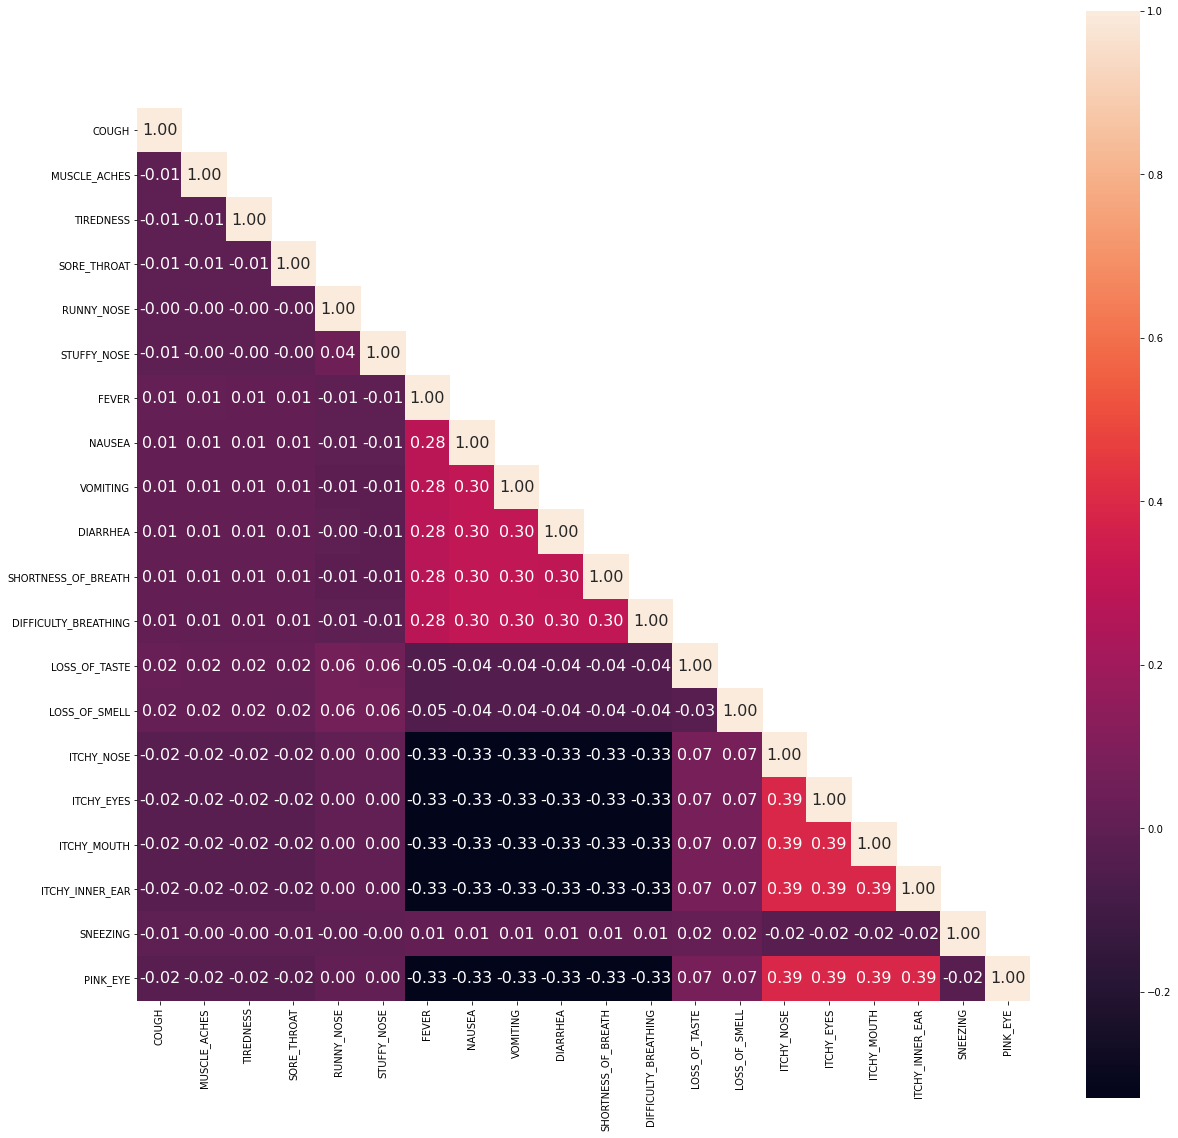

In [112]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb

dataset_corr = dataset.corr()
plt.figure(figsize=(20,20))
mask = np.zeros_like(dataset_corr)
mask[np.triu_indices_from(mask, k=1)] = True
sb.heatmap(dataset_corr, annot=True, square=True, mask=mask, fmt='.2f', annot_kws={"size": 16});

Next, we plotted some histograms to have a general idea of our dataset's composition. 

### All data histogram

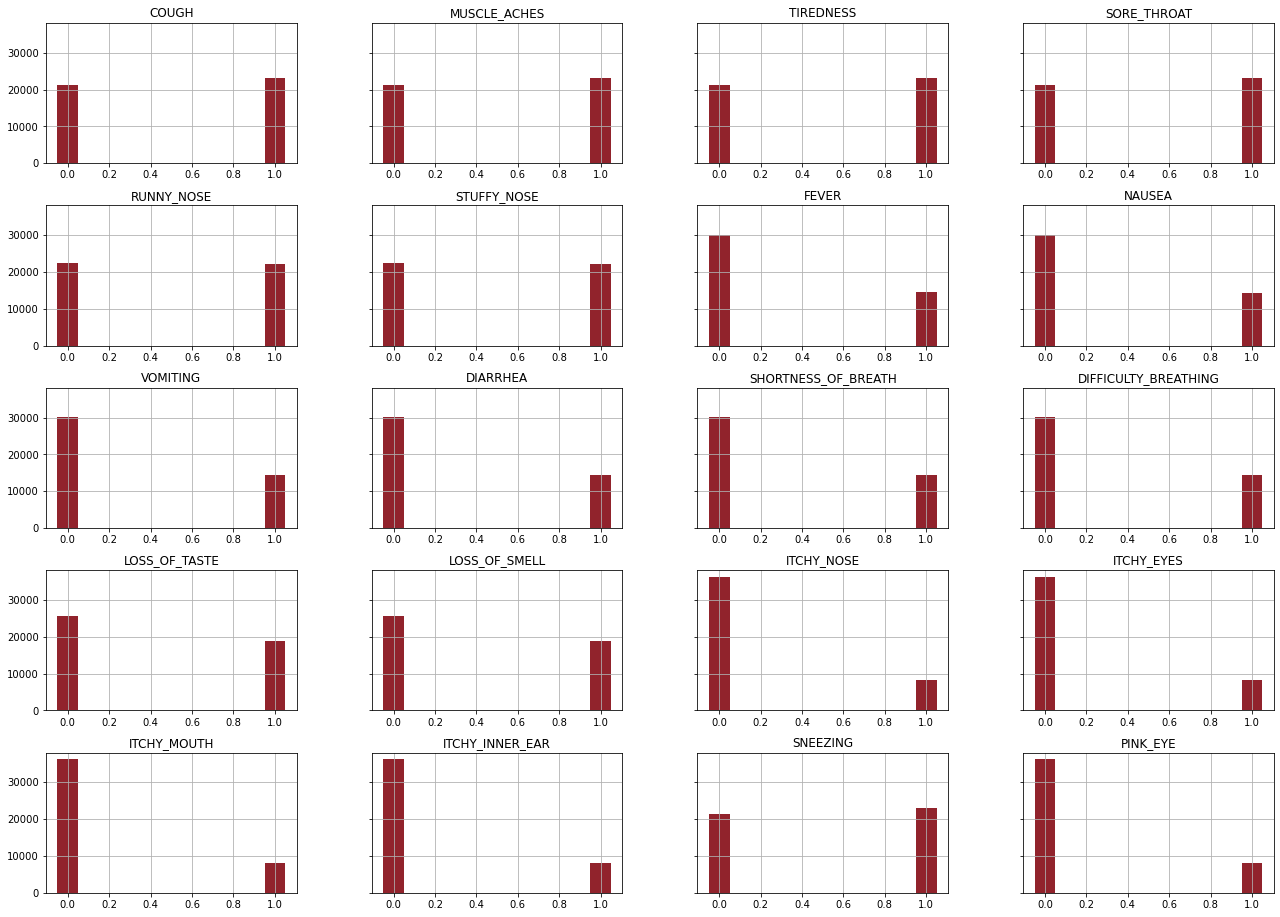

In [113]:
dataset.hist(bins=[-0.05, 0.05, 0.95, 1.05], range=(0,1), figsize=(22, 16), sharey=True, color='#91232C');

### Allergy data histogram

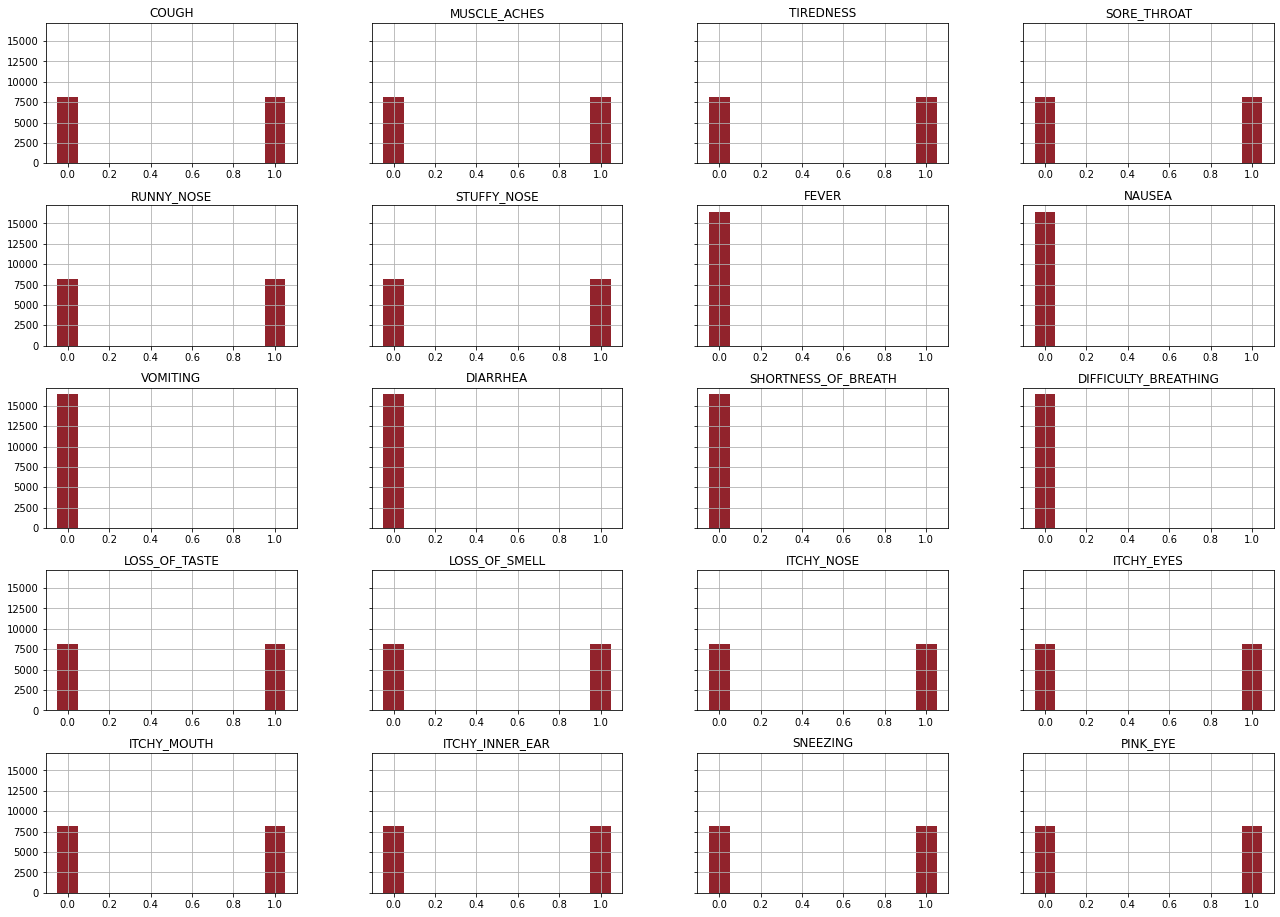

In [114]:
allergy_data = dataset.loc[dataset['TYPE'] == 'ALLERGY']
allergy_data.hist(bins=[-0.05, 0.05, 0.95, 1.05], range=(0,1), figsize=(22,16), sharey=True, color='#91232C');

### Cold data histogram

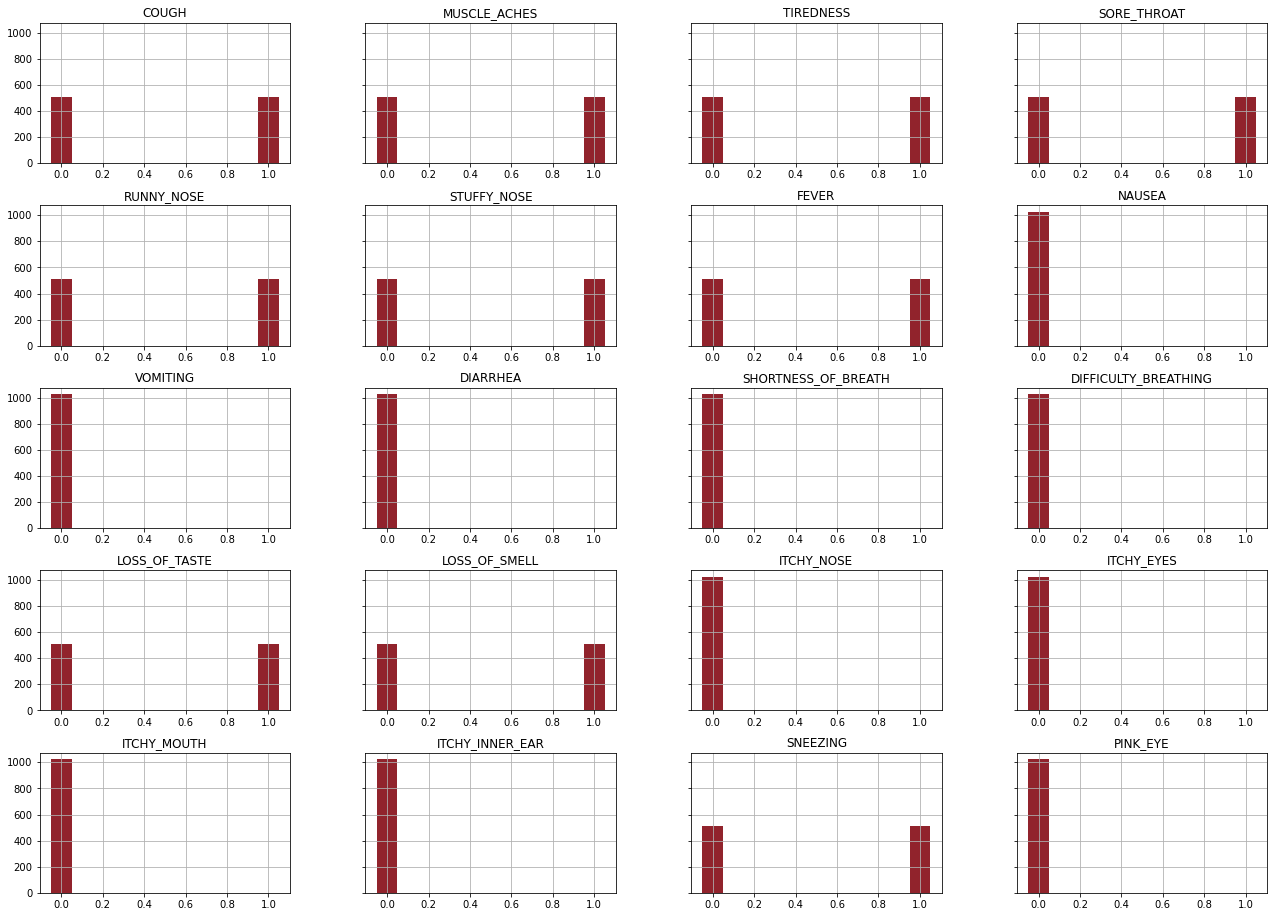

In [115]:
cold_data = dataset.loc[dataset['TYPE'] == 'COLD']
cold_data.hist(bins=[-0.05, 0.05, 0.95, 1.05], range=(0,1), figsize=(22,16), sharey=True, color='#91232C');

### Covid data histogram

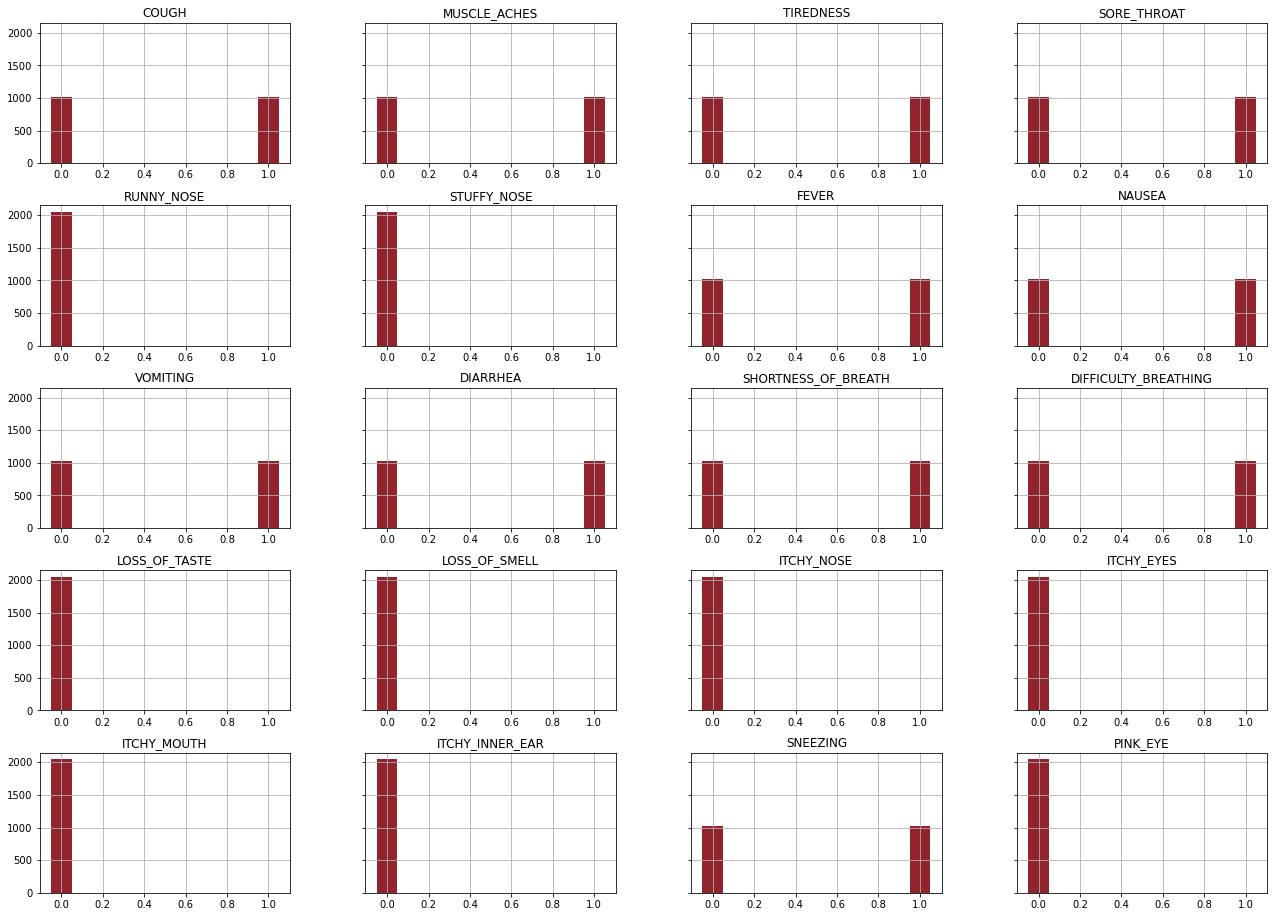

In [116]:
covid_data = dataset.loc[dataset['TYPE'] == 'COVID']
covid_data.hist(bins=[-0.05, 0.05, 0.95, 1.05], range=(0,1), figsize=(22,16), sharey=True, color='#91232C');

### Flu data histogram

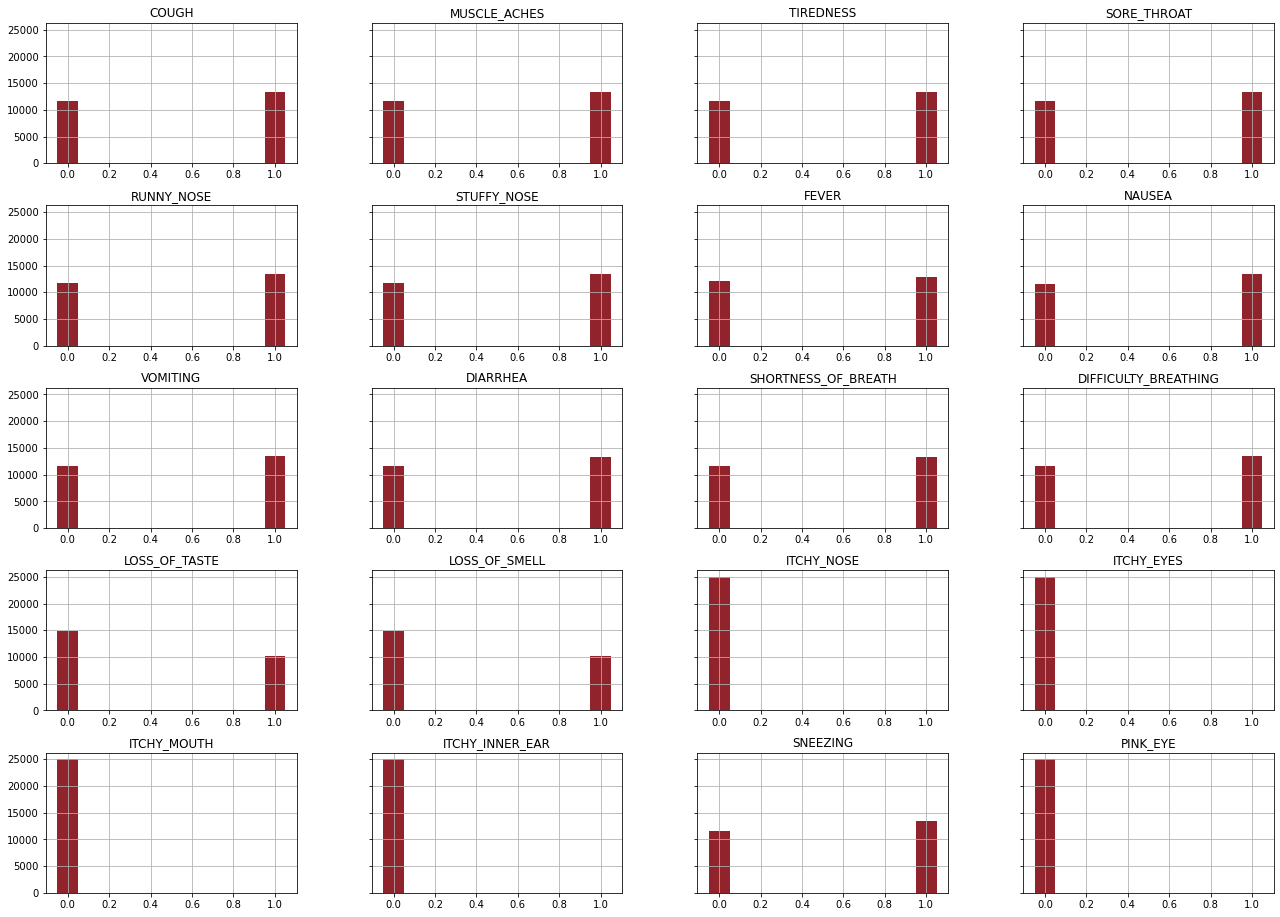

In [117]:
flu_data = dataset.loc[dataset['TYPE'] == 'FLU']
flu_data.hist(bins=[-0.05, 0.05, 0.95, 1.05], range=(0,1), figsize=(22,16), sharey=True, color='#91232C');

What we can conclude from this analysis is that the datasethas a very uniform distribution. For most of the symptoms, for each class, we see that either no cases have the symptom or the distribution is 75-25 or 50-50.

## Data preprocessing

Since our dataset did not contain null or invalid values or significant outliers, we did not have much preprocessing work to do. The only manipulation we did was split the dataset into input and label sets so that they could be passed to the SciKit classifiers we use.

In [9]:
dataset['TYPE'] = dataset['TYPE'].astype('category')

col_names = list(dataset.columns)
col_names.remove('TYPE')

inputs = dataset[col_names].values
labels = dataset['TYPE'].values

What we quickly observed was that the class distribution was extremely umbalanced. Over half of the cases were Flue cases, and only 2.3% were Cold cases.

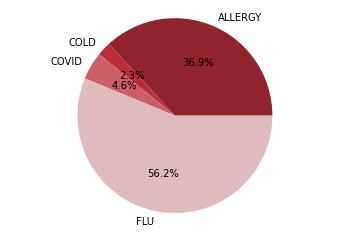

In [10]:
from collections import Counter

distribution_data = list(Counter(labels).values())

fig1, ax1 = plt.subplots()
colors = ( "#91232C","#B92D38","#CC5E66", "#E0BBBE") 
ax1.pie(distribution_data, colors = colors,labels=['ALLERGY', 'COLD', 'COVID', 'FLU'],autopct='%1.1f%%',)
ax1.axis('equal')  
plt.show()

#### Train and Test split data

We used SciKit's built-in train_test_split function in order to generate train and test datasets. We defined the trainig data as 1/4 of the entire dataset. We use the stratify option in order to maintain the original dataset's class distribution.

In [11]:
from sklearn.model_selection import train_test_split

(train_in,
 test_in,
 train_classes,
 test_classes) = train_test_split(inputs, labels, test_size=0.25, random_state=1, stratify=labels)

### Resampling

Our data analysis stage showed that our working dataset was heavily umbalanced.

Early exploratory analysis of classification methods proved that this was having a negative effect on the accuracy of the classifier, especially for the minority classes. To solve this problem we implemented resampling techniques that would generate a more balanced training set.

We implemented both **undersampling** and **oversampling**. These techniques differ in that undersampling removes samples from majority categories, while oversampling duplicates samples from minority categories. Oversampling is generally preffered, but undersampling generates smaller and therefore less complex datasets.

We used random undersampling that randomly chooses which samples to remove.

For oversampling we used the SMOTE (Synthetic Minority Over-sampling Technique) algorithm. This generates new samples interpolated from the existing ones.


In [12]:
from collections import Counter

print("---Train Set---")
print(Counter(train_classes))
print("\n---Test Set---")
print(Counter(test_classes))

---Train Set---
Counter({'FLU': 18750, 'ALLERGY': 12285, 'COVID': 1536, 'COLD': 768})

---Test Set---
Counter({'FLU': 6250, 'ALLERGY': 4096, 'COVID': 512, 'COLD': 256})


In [13]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()

us_inputs, us_labels = rus.fit_resample(train_in, train_classes)

print(Counter(us_labels))

Counter({'ALLERGY': 768, 'COLD': 768, 'COVID': 768, 'FLU': 768})


In [14]:
from imblearn.over_sampling import SMOTE

ros = SMOTE()

os_inputs, os_labels = ros.fit_resample(train_in, train_classes)

print(Counter(os_labels))

Counter({'ALLERGY': 18750, 'FLU': 18750, 'COLD': 18750, 'COVID': 18750})


Some of the algorithms we plan on using (KNN and SVM) require the data to be standardized. To do so, we used a StandardScaler from SciKit Learn's preprocessing library.

In [15]:
from sklearn.preprocessing import StandardScaler  

scaler = StandardScaler()

scaler.fit(train_in)
train_in = scaler.fit_transform(train_in)
test_in = scaler.fit_transform(test_in)

scaler.fit(os_inputs)
os_inputs = scaler.fit_transform(os_inputs)

scaler.fit(us_inputs)
us_inputs = scaler.fit_transform(us_inputs)

## Classification

Next we used SciKit Learn's classification algorithm implementations to classify our data:

- Decision Tree Classifier
- K-Nearest Neighbors
- Support Vector Machines
- Multilayer Perceptron (NN)

For each algorithm, we also used a Grid Search method to tune the algorithm's parameters.

## Decision Tree Classifier

#### Original dataset

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import json 

dtc = DecisionTreeClassifier()

dtc.fit(train_in, train_classes)
dtc_prediction = dtc.predict(test_in)

dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_classification_report.json", "w") as outfile: 
    json.dump(dtc_classification_report, outfile)

--- Original dataset ---

Confusion matrix:
[[3977  107    2   10]
 [ 114   76    9   57]
 [  10    6  100  396]
 [  47   68  448 5687]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       0.96      0.97      0.96      4096
        COLD       0.30      0.30      0.30       256
       COVID       0.18      0.20      0.19       512
         FLU       0.92      0.91      0.92      6250

    accuracy                           0.89     11114
   macro avg       0.59      0.59      0.59     11114
weighted avg       0.89      0.89      0.89     11114




#### Undersampled dataset

In [17]:
dtc.fit(us_inputs, us_labels)
dtc_prediction = dtc.predict(test_in)

dtc_us_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_us_classification_report.json", "w") as outfile: 
    json.dump(dtc_us_classification_report, outfile)

--- Undersampled dataset ---

Confusion matrix:
[[3969  125    1    1]
 [  24  219   11    2]
 [   0   17  437   58]
 [   4  115  477 5654]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       0.99      0.97      0.98      4096
        COLD       0.46      0.86      0.60       256
       COVID       0.47      0.85      0.61       512
         FLU       0.99      0.90      0.95      6250

    accuracy                           0.92     11114
   macro avg       0.73      0.90      0.78     11114
weighted avg       0.95      0.92      0.93     11114




#### Oversampled dataset

In [18]:
dtc.fit(os_inputs, os_labels)
dtc_prediction = dtc.predict(test_in)

dtc_os_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/dtc_os_classification_report.json", "w") as outfile: 
    json.dump(dtc_os_classification_report, outfile)

--- Oversampled dataset ---

Confusion matrix:
[[3971  113    2   10]
 [ 100   84   15   57]
 [   0   16  102  394]
 [  15  101  451 5683]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       0.97      0.97      0.97      4096
        COLD       0.27      0.33      0.29       256
       COVID       0.18      0.20      0.19       512
         FLU       0.92      0.91      0.92      6250

    accuracy                           0.89     11114
   macro avg       0.59      0.60      0.59     11114
weighted avg       0.89      0.89      0.89     11114




### Parameter Tunning (GridSearch)

In [19]:
from sklearn.model_selection import GridSearchCV

parameter_grid = {'criterion': ['gini', 'entropy'],
                  'splitter': ['best', 'random'],
                  'max_depth': [11, 13, 15, 17],
                  'max_features': [14, 15, 16, 17]}

grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid=parameter_grid,
                           cv=10,
                           verbose=4,
                           n_jobs=-1)

#### Original dataset

In [20]:
grid_search.fit(train_in, train_classes)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:   12.9s


Best score: 0.9288220933671051
Best parameters: {'criterion': 'gini', 'max_depth': 13, 'max_features': 14, 'splitter': 'random'}
Best estimator: DecisionTreeClassifier(max_depth=13, max_features=14, splitter='random')


[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   13.7s finished


In [21]:
dtc = grid_search.best_estimator_
dtc_prediction = dtc.predict(test_in)

best_dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Improved original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/best_dtc_classification_report.json", "w") as outfile: 
    json.dump(best_dtc_classification_report, outfile)

--- Improved original dataset ---

Confusion matrix:
[[4047   42    7    0]
 [  86  150   20    0]
 [   0    0  257  255]
 [  65   68  294 5823]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       0.96      0.99      0.98      4096
        COLD       0.58      0.59      0.58       256
       COVID       0.44      0.50      0.47       512
         FLU       0.96      0.93      0.94      6250

    accuracy                           0.92     11114
   macro avg       0.74      0.75      0.74     11114
weighted avg       0.93      0.92      0.93     11114




#### Undersampled dataset

In [22]:
grid_search.fit(us_inputs, us_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s


Best score: 0.9583400313042005
Best parameters: {'criterion': 'gini', 'max_depth': 11, 'max_features': 14, 'splitter': 'best'}
Best estimator: DecisionTreeClassifier(max_depth=11, max_features=14)


[Parallel(n_jobs=-1)]: Done 513 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:    0.8s finished


In [23]:
dtc = grid_search.best_estimator_
dtc_prediction = dtc.predict(test_in)

best_us_dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Improved undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/best_us_dtc_classification_report.json", "w") as outfile: 
    json.dump(best_us_dtc_classification_report, outfile)

--- Improved undersampled dataset ---

Confusion matrix:
[[3967  129    0    0]
 [   0  256    0    0]
 [   0   19  486    7]
 [   0  119  554 5577]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.49      1.00      0.66       256
       COVID       0.47      0.95      0.63       512
         FLU       1.00      0.89      0.94      6250

    accuracy                           0.93     11114
   macro avg       0.74      0.95      0.80     11114
weighted avg       0.96      0.93      0.94     11114




#### Oversampled dataset

In [24]:
grid_search.fit(os_inputs, os_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done 597 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   36.3s finished


Best score: 0.9578533333333332
Best parameters: {'criterion': 'gini', 'max_depth': 17, 'max_features': 15, 'splitter': 'random'}
Best estimator: DecisionTreeClassifier(max_depth=17, max_features=15, splitter='random')


In [25]:
dtc = grid_search.best_estimator_
dtc_prediction = dtc.predict(test_in)

best_os_dtc_classification_report = classification_report(test_classes, dtc_prediction, output_dict=True)

print("--- Improved oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, dtc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, dtc_prediction)}\n")

with open("./reports/best_os_dtc_classification_report.json", "w") as outfile: 
    json.dump(best_os_dtc_classification_report, outfile)

--- Improved oversampled dataset ---

Confusion matrix:
[[3591  496    9    0]
 [   0  251    5    0]
 [   0   19  197  296]
 [   0  117  443 5690]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.88      0.93      4096
        COLD       0.28      0.98      0.44       256
       COVID       0.30      0.38      0.34       512
         FLU       0.95      0.91      0.93      6250

    accuracy                           0.88     11114
   macro avg       0.63      0.79      0.66     11114
weighted avg       0.92      0.88      0.89     11114




## K-Nearest Neighbors

#### Original dataset

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(train_in, train_classes)
knn_prediction = knn.predict(test_in)

knn_classification_report = classification_report(test_classes, knn_prediction, output_dict=True)

print("--- Original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, knn_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, knn_prediction)}\n") 

with open("./reports/knn_classification_report.json", "w") as outfile: 
    json.dump(knn_classification_report, outfile)

--- Original dataset ---

Confusion matrix:
[[4008   81    0    7]
 [ 103  106    4   43]
 [   7    9   53  443]
 [  44   69  252 5885]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       0.96      0.98      0.97      4096
        COLD       0.40      0.41      0.41       256
       COVID       0.17      0.10      0.13       512
         FLU       0.92      0.94      0.93      6250

    accuracy                           0.90     11114
   macro avg       0.61      0.61      0.61     11114
weighted avg       0.89      0.90      0.90     11114




#### Undersampled dataset

In [27]:
knn.fit(us_inputs, us_labels)
knn_prediction = knn.predict(test_in)

knn_us_classification_report = classification_report(test_classes, knn_prediction, output_dict=True)

print("--- Undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, knn_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, knn_prediction)}\n")

with open("./reports/knn_us_classification_report.json", "w") as outfile: 
    json.dump(knn_us_classification_report, outfile)

--- Undersampled dataset ---

Confusion matrix:
[[3673  421    2    0]
 [   1  253    2    0]
 [   0   21  489    2]
 [   2  773 2575 2900]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.90      0.95      4096
        COLD       0.17      0.99      0.29       256
       COVID       0.16      0.96      0.27       512
         FLU       1.00      0.46      0.63      6250

    accuracy                           0.66     11114
   macro avg       0.58      0.83      0.54     11114
weighted avg       0.94      0.66      0.72     11114




#### Oversampled dataset

In [28]:
knn.fit(os_inputs, os_labels)
knn_prediction = knn.predict(test_in)

knn_os_classification_report = classification_report(test_classes, knn_prediction, output_dict=True)

print("--- Oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, knn_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, knn_prediction)}\n")

with open("./reports/knn_os_classification_report.json", "w") as outfile: 
    json.dump(knn_os_classification_report, outfile)

--- Oversampled dataset ---

Confusion matrix:
[[3972  118    5    1]
 [  86  145   19    6]
 [   4   16  434   58]
 [  41  239 1748 4222]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       0.97      0.97      0.97      4096
        COLD       0.28      0.57      0.37       256
       COVID       0.20      0.85      0.32       512
         FLU       0.98      0.68      0.80      6250

    accuracy                           0.79     11114
   macro avg       0.61      0.76      0.62     11114
weighted avg       0.93      0.79      0.83     11114




### Parameter Tunning

In [99]:
parameter_grid = {'n_neighbors': [5, 10, 15],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['ball_tree', 'kd_tree', 'brute']}

grid_search = GridSearchCV(KNeighborsClassifier(),
                           param_grid=parameter_grid,
                           cv=10,
                           verbose=4,
                           n_jobs=-1)

#### Original dataset

In [30]:
grid_search.fit(train_in, train_classes)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.7min finished


Best score: 0.9231830771559458
Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 15, 'weights': 'uniform'}
Best estimator: KNeighborsClassifier(algorithm='ball_tree', n_neighbors=15)


In [31]:
knn = grid_search.best_estimator_
knn_prediction = knn.predict(test_in)

best_knn_classification_report = classification_report(test_classes, knn_prediction, output_dict=True)

print("--- Improved original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, knn_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, knn_prediction)}\n")

with open("./reports/best_knn_classification_report.json", "w") as outfile: 
    json.dump(best_knn_classification_report, outfile)

--- Improved original dataset ---

Confusion matrix:
[[4012   70    0   14]
 [  91  114    0   51]
 [   3   11   38  460]
 [  43   59   99 6049]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       0.97      0.98      0.97      4096
        COLD       0.45      0.45      0.45       256
       COVID       0.28      0.07      0.12       512
         FLU       0.92      0.97      0.94      6250

    accuracy                           0.92     11114
   macro avg       0.65      0.62      0.62     11114
weighted avg       0.90      0.92      0.90     11114




#### Undersampled dataset

In [32]:
grid_search.fit(us_inputs, us_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s


Best score: 0.8880261432378695
Best parameters: {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}
Best estimator: KNeighborsClassifier(algorithm='ball_tree')


[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    1.4s finished


In [33]:
knn = grid_search.best_estimator_
knn_prediction = knn.predict(test_in)

best_us_knn_classification_report = classification_report(test_classes, knn_prediction, output_dict=True)

print("--- Improved undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, knn_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, knn_prediction)}\n")

with open("./reports/best_us_knn_classification_report.json", "w") as outfile: 
    json.dump(best_us_knn_classification_report, outfile)

--- Improved undersampled dataset ---

Confusion matrix:
[[3675  419    2    0]
 [   1  253    2    0]
 [   0   21  489    2]
 [   2  772 2574 2902]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.90      0.95      4096
        COLD       0.17      0.99      0.29       256
       COVID       0.16      0.96      0.27       512
         FLU       1.00      0.46      0.63      6250

    accuracy                           0.66     11114
   macro avg       0.58      0.83      0.54     11114
weighted avg       0.94      0.66      0.72     11114




#### Oversampled dataset

In [100]:
grid_search.fit(os_inputs, os_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 22.2min finished


Best score: 0.9539200000000001
Best parameters: {'algorithm': 'brute', 'n_neighbors': 5, 'weights': 'distance'}
Best estimator: KNeighborsClassifier(algorithm='brute', weights='distance')


In [101]:
knn = grid_search.best_estimator_
knn_prediction = knn.predict(test_in)

best_os_knn_classification_report = classification_report(test_classes, knn_prediction, output_dict=True)

print("--- Improved oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, knn_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, knn_prediction)}\n")

with open("./reports/best_os_knn_classification_report.json", "w") as outfile: 
    json.dump(best_os_knn_classification_report, outfile)

--- Improved oversampled dataset ---

Confusion matrix:
[[3968  115    9    4]
 [  72  133   28   23]
 [   0   17  347  148]
 [  17  279 1757 4197]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       0.98      0.97      0.97      4096
        COLD       0.24      0.52      0.33       256
       COVID       0.16      0.68      0.26       512
         FLU       0.96      0.67      0.79      6250

    accuracy                           0.78     11114
   macro avg       0.59      0.71      0.59     11114
weighted avg       0.91      0.78      0.82     11114




## Support-vector machines

#### Original dataset

In [36]:
from sklearn.svm import SVC

svc = SVC()

svc.fit(train_in, train_classes)
svc_prediction = svc.predict(test_in)

svc_classification_report = classification_report(test_classes, svc_prediction, output_dict=True)

print("--- Original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, svc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, svc_prediction)}\n")

with open("./reports/svc_classification_report.json", "w") as outfile: 
    json.dump(svc_classification_report, outfile)

--- Original dataset ---

Confusion matrix:
[[4065   31    0    0]
 [ 130  119    7    0]
 [  11    3  211  287]
 [  58   57  310 5825]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       0.95      0.99      0.97      4096
        COLD       0.57      0.46      0.51       256
       COVID       0.40      0.41      0.41       512
         FLU       0.95      0.93      0.94      6250

    accuracy                           0.92     11114
   macro avg       0.72      0.70      0.71     11114
weighted avg       0.92      0.92      0.92     11114




#### Undersampled dataset

In [37]:
svc.fit(us_inputs, us_labels)
svc_prediction = svc.predict(test_in)

svc_us_classification_report = classification_report(test_classes, svc_prediction, output_dict=True)

print("--- Undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, svc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, svc_prediction)}\n")

with open("./reports/svc_us_classification_report.json", "w") as outfile: 
    json.dump(svc_us_classification_report, outfile)

--- Undersampled dataset ---

Confusion matrix:
[[3967  129    0    0]
 [   0  256    0    0]
 [   0   19  493    0]
 [   1  119  484 5646]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.49      1.00      0.66       256
       COVID       0.50      0.96      0.66       512
         FLU       1.00      0.90      0.95      6250

    accuracy                           0.93     11114
   macro avg       0.75      0.96      0.81     11114
weighted avg       0.97      0.93      0.94     11114




#### Oversampled dataset

In [38]:
svc.fit(os_inputs, os_labels)
svc_prediction = svc.predict(test_in)

svc_os_classification_report = classification_report(test_classes, svc_prediction, output_dict=True)

print("--- Oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, svc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, svc_prediction)}\n")

with open("./reports/svc_os_classification_report.json", "w") as outfile: 
    json.dump(svc_os_classification_report, outfile)

--- Oversampled dataset ---

Confusion matrix:
[[3967  128    1    0]
 [   0  246   10    0]
 [   0   17  495    0]
 [   0  119  484 5647]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.48      0.96      0.64       256
       COVID       0.50      0.97      0.66       512
         FLU       1.00      0.90      0.95      6250

    accuracy                           0.93     11114
   macro avg       0.75      0.95      0.81     11114
weighted avg       0.97      0.93      0.94     11114




### Parameter Tunning

In [39]:
parameter_grid = {'C' : [0.1, 1, 10],
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

grid_search = GridSearchCV(SVC(),
                           param_grid=parameter_grid,
                           cv=10,
                           verbose=4,
                           n_jobs=-1)

#### Original dataset

In [40]:
grid_search.fit(train_in, train_classes)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.2min finished


Best score: 0.937160542688942
Best parameters: {'C': 1, 'kernel': 'sigmoid'}
Best estimator: SVC(C=1, kernel='sigmoid')


In [41]:
svc = grid_search.best_estimator_
svc_prediction = svc.predict(test_in)

best_svc_classification_report = classification_report(test_classes, svc_prediction, output_dict=True)

print("--- Improved original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, svc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, svc_prediction)}\n")

with open("./reports/best_svc_classification_report.json", "w") as outfile: 
    json.dump(best_svc_classification_report, outfile)

--- Improved original dataset ---

Confusion matrix:
[[4096    0    0    0]
 [ 133  119    4    0]
 [  10    4  278  220]
 [  63   53  206 5928]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       0.95      1.00      0.98      4096
        COLD       0.68      0.46      0.55       256
       COVID       0.57      0.54      0.56       512
         FLU       0.96      0.95      0.96      6250

    accuracy                           0.94     11114
   macro avg       0.79      0.74      0.76     11114
weighted avg       0.93      0.94      0.94     11114




#### Undersampled dataset

In [42]:
grid_search.fit(us_inputs, us_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s


Best score: 0.960945894496383
Best parameters: {'C': 0.1, 'kernel': 'linear'}
Best estimator: SVC(C=0.1, kernel='linear')


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    3.1s finished


In [43]:
svc = grid_search.best_estimator_
svc_prediction = svc.predict(test_in)

best_us_svc_classification_report = classification_report(test_classes, svc_prediction, output_dict=True)

print("--- Improved undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, svc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, svc_prediction)}\n")

with open("./reports/best_us_svc_classification_report.json", "w") as outfile: 
    json.dump(best_us_svc_classification_report, outfile)

--- Improved undersampled dataset ---

Confusion matrix:
[[3967  129    0    0]
 [   0  256    0    0]
 [   0   19  493    0]
 [   0  119  484 5647]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.49      1.00      0.66       256
       COVID       0.50      0.96      0.66       512
         FLU       1.00      0.90      0.95      6250

    accuracy                           0.93     11114
   macro avg       0.75      0.96      0.81     11114
weighted avg       0.97      0.93      0.94     11114




#### Oversampled dataset

In [44]:
grid_search.fit(os_inputs, os_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 21.7min finished


Best score: 0.9594400000000001
Best parameters: {'C': 10, 'kernel': 'rbf'}
Best estimator: SVC(C=10)


In [45]:
svc = grid_search.best_estimator_
svc_prediction = svc.predict(test_in)

best_os_svc_classification_report = classification_report(test_classes, svc_prediction, output_dict=True)

print("--- Improved oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, svc_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, svc_prediction)}\n")

with open("./reports/best_os_svc_classification_report.json", "w") as outfile: 
    json.dump(best_os_svc_classification_report, outfile)

--- Improved oversampled dataset ---

Confusion matrix:
[[3967  128    1    0]
 [   0  240   16    0]
 [   0   15  497    0]
 [   0  118  485 5647]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.48      0.94      0.63       256
       COVID       0.50      0.97      0.66       512
         FLU       1.00      0.90      0.95      6250

    accuracy                           0.93     11114
   macro avg       0.74      0.95      0.81     11114
weighted avg       0.96      0.93      0.94     11114




## Multilayer Perceptron (Neural Network)

#### Original dataset

In [46]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()

mlp.fit(train_in, train_classes)
mlp_prediction = mlp.predict(test_in)

mlp_classification_report = classification_report(test_classes, mlp_prediction, output_dict=True)

print("--- Original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, mlp_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, mlp_prediction)}\n")

with open("./reports/mlp_classification_report.json", "w") as outfile: 
    json.dump(mlp_classification_report, outfile)

--- Original dataset ---

Confusion matrix:
[[3977  101    2   16]
 [  49  145   10   52]
 [   2    5  207  298]
 [  17   78  367 5788]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       0.98      0.97      0.98      4096
        COLD       0.44      0.57      0.50       256
       COVID       0.35      0.40      0.38       512
         FLU       0.94      0.93      0.93      6250

    accuracy                           0.91     11114
   macro avg       0.68      0.72      0.70     11114
weighted avg       0.92      0.91      0.91     11114




#### Undersampled dataset

In [47]:
mlp.fit(us_inputs, us_labels)
mlp_prediction = mlp.predict(test_in)

mlp_us_classification_report = classification_report(test_classes, mlp_prediction, output_dict=True)

print("--- Undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, mlp_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, mlp_prediction)}\n")

with open("./reports/mlp_us_classification_report.json", "w") as outfile: 
    json.dump(mlp_us_classification_report, outfile)

/home/antonio/.asdf/installs/python/anaconda3-2020.11/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


--- Undersampled dataset ---

Confusion matrix:
[[3964  130    2    0]
 [   0  250    6    0]
 [   0   17  495    0]
 [   0  136  485 5629]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.47      0.98      0.63       256
       COVID       0.50      0.97      0.66       512
         FLU       1.00      0.90      0.95      6250

    accuracy                           0.93     11114
   macro avg       0.74      0.95      0.81     11114
weighted avg       0.96      0.93      0.94     11114




#### Oversampled dataset

In [48]:
mlp.fit(os_inputs, os_labels)
mlp_prediction = mlp.predict(test_in)

mlp_os_classification_report = classification_report(test_classes, mlp_prediction, output_dict=True)

print("--- Oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, mlp_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, mlp_prediction)}\n")

with open("./reports/mlp_os_classification_report.json", "w") as outfile: 
    json.dump(mlp_os_classification_report, outfile)

--- Oversampled dataset ---

Confusion matrix:
[[3967  126    3    0]
 [   0  238   18    0]
 [   0   16  496    0]
 [   0  120  485 5645]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.48      0.93      0.63       256
       COVID       0.50      0.97      0.66       512
         FLU       1.00      0.90      0.95      6250

    accuracy                           0.93     11114
   macro avg       0.74      0.94      0.80     11114
weighted avg       0.96      0.93      0.94     11114




### Parameter Tunning

In [49]:
parameter_grid = {'hidden_layer_sizes': [50, 100, 150],
                  'activation' : ['logistic', 'tanh', 'relu'],
                  'solver': ['lbfgs', 'adam']}

grid_search = GridSearchCV(MLPClassifier(), 
                           param_grid=parameter_grid, 
                           cv=10,
                           verbose=4,
                           n_jobs=-1)

#### Original dataset

In [50]:
grid_search.fit(train_in, train_classes)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   38.1s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 12.4min finished


Best score: 0.9300219434060983
Best parameters: {'activation': 'logistic', 'hidden_layer_sizes': 100, 'solver': 'adam'}
Best estimator: MLPClassifier(activation='logistic', hidden_layer_sizes=100)


In [51]:
mlp = grid_search.best_estimator_
mlp_prediction = mlp.predict(test_in)

best_mlp_classification_report = classification_report(test_classes, mlp_prediction, output_dict=True)

print("--- Improved original dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, mlp_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, mlp_prediction)}\n") 

with open("./reports/best_mlp_classification_report.json", "w") as outfile: 
    json.dump(best_mlp_classification_report, outfile)

--- Improved original dataset ---

Confusion matrix:
[[3967  112    0   17]
 [   1  224    8   23]
 [   0   10   53  449]
 [   0   92   77 6081]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.51      0.88      0.65       256
       COVID       0.38      0.10      0.16       512
         FLU       0.93      0.97      0.95      6250

    accuracy                           0.93     11114
   macro avg       0.71      0.73      0.69     11114
weighted avg       0.92      0.93      0.92     11114




#### Undersampled dataset

In [52]:
grid_search.fit(us_inputs, us_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   38.8s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  1.6min finished


Best score: 0.960945894496383
Best parameters: {'activation': 'logistic', 'hidden_layer_sizes': 50, 'solver': 'adam'}
Best estimator: MLPClassifier(activation='logistic', hidden_layer_sizes=50)


/home/antonio/.asdf/installs/python/anaconda3-2020.11/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [53]:
mlp = grid_search.best_estimator_
mlp_prediction = mlp.predict(test_in)

best_us_mlp_classification_report = classification_report(test_classes, mlp_prediction, output_dict=True)

print("--- Improved undersampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, mlp_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, mlp_prediction)}\n")

with open("./reports/best_us_mlp_classification_report.json", "w") as outfile: 
    json.dump(best_us_mlp_classification_report, outfile)

--- Improved undersampled dataset ---

Confusion matrix:
[[3967  129    0    0]
 [   0  256    0    0]
 [   0   19  493    0]
 [   0  140  484 5626]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.47      1.00      0.64       256
       COVID       0.50      0.96      0.66       512
         FLU       1.00      0.90      0.95      6250

    accuracy                           0.93     11114
   macro avg       0.74      0.96      0.81     11114
weighted avg       0.96      0.93      0.94     11114




#### Oversampled dataset

In [54]:
grid_search.fit(os_inputs, os_labels)
print(f"Best score: {grid_search.best_score_}")
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best estimator: {grid_search.best_estimator_}")

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed: 41.7min finished


Best score: 0.9611066666666666
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': 100, 'solver': 'adam'}
Best estimator: MLPClassifier(activation='tanh', hidden_layer_sizes=100)


/home/antonio/.asdf/installs/python/anaconda3-2020.11/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [55]:
mlp = grid_search.best_estimator_
mlp_prediction = mlp.predict(test_in)

best_os_mlp_classification_report = classification_report(test_classes, mlp_prediction, output_dict=True)

print("--- Improved oversampled dataset ---\n")
print(f"Confusion matrix:\n{confusion_matrix(test_classes, mlp_prediction)}\n")
print(f"Classification report:\n{classification_report(test_classes, mlp_prediction)}\n") 

with open("./reports/best_os_mlp_classification_report.json", "w") as outfile: 
    json.dump(best_os_mlp_classification_report, outfile)

--- Improved oversampled dataset ---

Confusion matrix:
[[3963  131    2    0]
 [   4  232   18    2]
 [   0   16  496    0]
 [   1  121  485 5643]]

Classification report:
              precision    recall  f1-score   support

     ALLERGY       1.00      0.97      0.98      4096
        COLD       0.46      0.91      0.61       256
       COVID       0.50      0.97      0.66       512
         FLU       1.00      0.90      0.95      6250

    accuracy                           0.93     11114
   macro avg       0.74      0.94      0.80     11114
weighted avg       0.96      0.93      0.94     11114




## Result Analysis

In [102]:
with open("./reports/dtc_classification_report.json") as json_file:
    dtc_classification_report = json.load(json_file)
with open("./reports/dtc_us_classification_report.json") as json_file:
    dtc_us_classification_report = json.load(json_file)
with open("./reports/dtc_os_classification_report.json") as json_file:
    dtc_os_classification_report = json.load(json_file)
    
with open("./reports/best_dtc_classification_report.json") as json_file:
    best_dtc_classification_report = json.load(json_file)
with open("./reports/best_us_dtc_classification_report.json") as json_file:
    best_us_dtc_classification_report = json.load(json_file)
with open("./reports/best_os_dtc_classification_report.json") as json_file:
    best_os_dtc_classification_report = json.load(json_file)


with open("./reports/knn_classification_report.json") as json_file:
    knn_classification_report = json.load(json_file)
with open("./reports/knn_us_classification_report.json") as json_file:
    knn_us_classification_report = json.load(json_file)
with open("./reports/knn_os_classification_report.json") as json_file:
    knn_os_classification_report = json.load(json_file)

with open("./reports/best_knn_classification_report.json") as json_file:
    best_knn_classification_report = json.load(json_file)
with open("./reports/best_us_knn_classification_report.json") as json_file:
    best_us_knn_classification_report = json.load(json_file)
with open("./reports/best_os_knn_classification_report.json") as json_file:
    best_os_knn_classification_report = json.load(json_file)


with open("./reports/svc_classification_report.json") as json_file:
    svc_classification_report = json.load(json_file)
with open("./reports/svc_us_classification_report.json") as json_file:
    svc_us_classification_report = json.load(json_file)
with open("./reports/svc_os_classification_report.json") as json_file:
    svc_os_classification_report = json.load(json_file)

with open("./reports/best_svc_classification_report.json") as json_file:
    best_svc_classification_report = json.load(json_file)
with open("./reports/best_us_svc_classification_report.json") as json_file:
    best_us_svc_classification_report = json.load(json_file)
with open("./reports/best_os_svc_classification_report.json") as json_file:
    best_os_svc_classification_report = json.load(json_file)


with open("./reports/mlp_classification_report.json") as json_file:
    mlp_classification_report = json.load(json_file)
with open("./reports/mlp_us_classification_report.json") as json_file:
    mlp_us_classification_report = json.load(json_file)
with open("./reports/mlp_os_classification_report.json") as json_file:
    mlp_os_classification_report = json.load(json_file)

with open("./reports/best_mlp_classification_report.json") as json_file:
    best_mlp_classification_report = json.load(json_file)
with open("./reports/best_us_mlp_classification_report.json") as json_file:
    best_us_mlp_classification_report = json.load(json_file)
with open("./reports/best_os_mlp_classification_report.json") as json_file:
    best_os_mlp_classification_report = json.load(json_file)

### Accuracy comparison

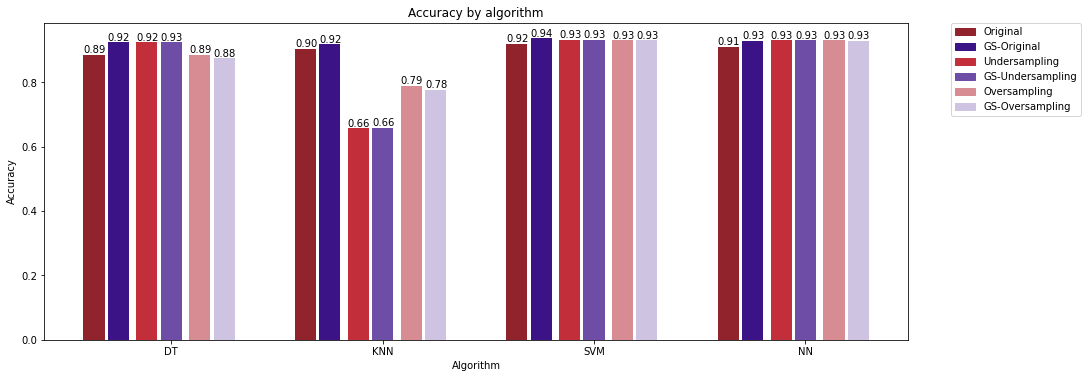

In [103]:
prediction_data = [
    [dtc_classification_report['accuracy'], knn_classification_report['accuracy'], svc_classification_report['accuracy'], mlp_classification_report['accuracy']],
    [best_dtc_classification_report['accuracy'], best_knn_classification_report['accuracy'], best_svc_classification_report['accuracy'], best_mlp_classification_report['accuracy']],
    [dtc_us_classification_report['accuracy'], knn_us_classification_report['accuracy'], svc_us_classification_report['accuracy'], mlp_us_classification_report['accuracy']],
    [best_us_dtc_classification_report['accuracy'], best_us_knn_classification_report['accuracy'], best_us_svc_classification_report['accuracy'], best_us_mlp_classification_report['accuracy']],
    [dtc_os_classification_report['accuracy'], knn_os_classification_report['accuracy'], svc_os_classification_report['accuracy'], mlp_os_classification_report['accuracy']],
    [best_os_dtc_classification_report['accuracy'], best_os_knn_classification_report['accuracy'], best_os_svc_classification_report['accuracy'], best_os_mlp_classification_report['accuracy']],
]

X = np.arange(0,8,2)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1.1])

ax.bar(X, prediction_data[0], color='#91232C', width=0.2)
for i in range(4):
    plt.text(X[i] - 0.1, prediction_data[0][i] + 0.005, f"{prediction_data[0][i]:.2f}")
ax.bar(X + 0.23, prediction_data[1], color='#3C1287', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.13, prediction_data[1][i] + 0.005, f"{prediction_data[1][i]:.2f}")

ax.bar(X + 0.5, prediction_data[2], color='#C22F3A', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.4, prediction_data[2][i] + 0.005, f"{prediction_data[2][i]:.2f}")
ax.bar(X + 0.73, prediction_data[3], color='#6D4DA5', width=0.2, tick_label=['DT', 'KNN', 'SVM', 'NN'])
for i in range(4):
    plt.text(X[i] + 0.63, prediction_data[3][i] + 0.005, f"{prediction_data[3][i]:.2f}")

ax.bar(X + 1, prediction_data[4], color='#D68C92', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.9, prediction_data[4][i] + 0.005, f"{prediction_data[4][i]:.2f}")
ax.bar(X + 1.23, prediction_data[5], color='#CEC4E1', width=0.2)
for i in range(4):
    plt.text(X[i] + 1.13, prediction_data[5][i] + 0.005, f"{prediction_data[5][i]:.2f}")

ax.set_ylim(ymin=0)

original = mpatches.Patch(color='#91232C', label='Original')
best_og = mpatches.Patch(color='#3C1287', label='GS-Original')
undersampled = mpatches.Patch(color='#C22F3A', label='Undersampling')
best_us = mpatches.Patch(color='#6D4DA5', label='GS-Undersampling')
oversampled = mpatches.Patch(color='#D68C92', label='Oversampling')
best_os = mpatches.Patch(color='#CEC4E1', label='GS-Oversampling')
plt.legend(handles=[original, best_og, undersampled, best_us, oversampled, best_os], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("Accuracy")
plt.title("Accuracy by algorithm")

plt.show()

### F1-Score comparison

#### Allergy Class

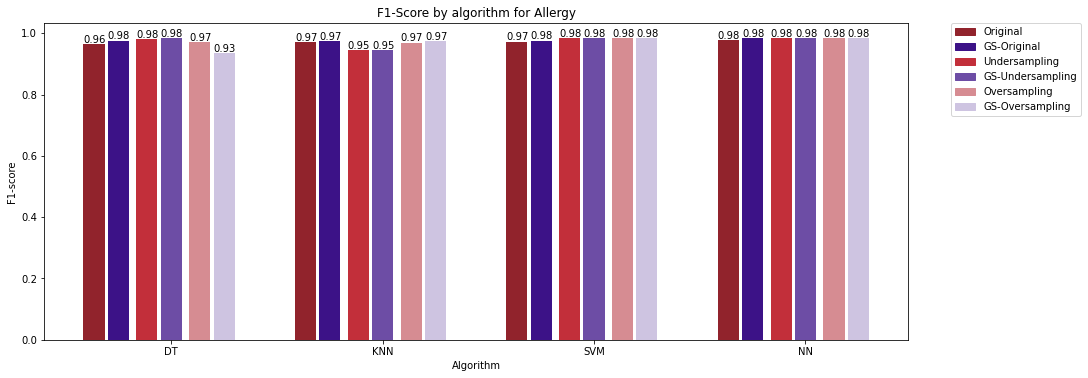

In [104]:
prediction_data = [
    [dtc_classification_report['ALLERGY']['f1-score'], knn_classification_report['ALLERGY']['f1-score'], svc_classification_report['ALLERGY']['f1-score'], mlp_classification_report['ALLERGY']['f1-score']],
    [best_dtc_classification_report['ALLERGY']['f1-score'], best_knn_classification_report['ALLERGY']['f1-score'], best_svc_classification_report['ALLERGY']['f1-score'], best_mlp_classification_report['ALLERGY']['f1-score']],
    [dtc_us_classification_report['ALLERGY']['f1-score'], knn_us_classification_report['ALLERGY']['f1-score'], svc_us_classification_report['ALLERGY']['f1-score'], mlp_us_classification_report['ALLERGY']['f1-score']],
    [best_us_dtc_classification_report['ALLERGY']['f1-score'], best_us_knn_classification_report['ALLERGY']['f1-score'], best_us_svc_classification_report['ALLERGY']['f1-score'], best_us_mlp_classification_report['ALLERGY']['f1-score']],
    [dtc_os_classification_report['ALLERGY']['f1-score'], knn_os_classification_report['ALLERGY']['f1-score'], svc_os_classification_report['ALLERGY']['f1-score'], mlp_os_classification_report['ALLERGY']['f1-score']],
    [best_os_dtc_classification_report['ALLERGY']['f1-score'], best_os_knn_classification_report['ALLERGY']['f1-score'], best_os_svc_classification_report['ALLERGY']['f1-score'], best_os_mlp_classification_report['ALLERGY']['f1-score']],
]

X = np.arange(0,8,2)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1.1])

ax.bar(X, prediction_data[0], color='#91232C', width=0.2)
for i in range(4):
    plt.text(X[i] - 0.1, prediction_data[0][i] + 0.005, f"{prediction_data[0][i]:.2f}")
ax.bar(X + 0.23, prediction_data[1], color='#3C1287', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.13, prediction_data[1][i] + 0.005, f"{prediction_data[1][i]:.2f}")

ax.bar(X + 0.5, prediction_data[2], color='#C22F3A', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.4, prediction_data[2][i] + 0.005, f"{prediction_data[2][i]:.2f}")
ax.bar(X + 0.73, prediction_data[3], color='#6D4DA5', width=0.2, tick_label=['DT', 'KNN', 'SVM', 'NN'])
for i in range(4):
    plt.text(X[i] + 0.63, prediction_data[3][i] + 0.005, f"{prediction_data[3][i]:.2f}")

ax.bar(X + 1, prediction_data[4], color='#D68C92', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.9, prediction_data[4][i] + 0.005, f"{prediction_data[4][i]:.2f}")
ax.bar(X + 1.23, prediction_data[5], color='#CEC4E1', width=0.2)
for i in range(4):
    plt.text(X[i] + 1.13, prediction_data[5][i] + 0.005, f"{prediction_data[5][i]:.2f}")

ax.set_ylim(ymin=0)

original = mpatches.Patch(color='#91232C', label='Original')
best_og = mpatches.Patch(color='#3C1287', label='GS-Original')
undersampled = mpatches.Patch(color='#C22F3A', label='Undersampling')
best_us = mpatches.Patch(color='#6D4DA5', label='GS-Undersampling')
oversampled = mpatches.Patch(color='#D68C92', label='Oversampling')
best_os = mpatches.Patch(color='#CEC4E1', label='GS-Oversampling')
plt.legend(handles=[original, best_og, undersampled, best_us, oversampled, best_os], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("F1-score")
plt.title("F1-Score by algorithm for Allergy")

plt.show()

#### Cold Class

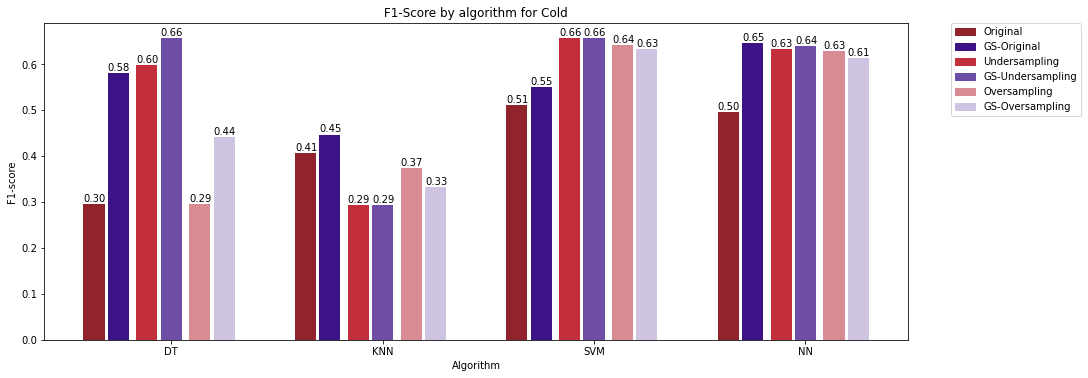

In [105]:
prediction_data = [
    [dtc_classification_report['COLD']['f1-score'], knn_classification_report['COLD']['f1-score'], svc_classification_report['COLD']['f1-score'], mlp_classification_report['COLD']['f1-score']],
    [best_dtc_classification_report['COLD']['f1-score'], best_knn_classification_report['COLD']['f1-score'], best_svc_classification_report['COLD']['f1-score'], best_mlp_classification_report['COLD']['f1-score']],
    [dtc_us_classification_report['COLD']['f1-score'], knn_us_classification_report['COLD']['f1-score'], svc_us_classification_report['COLD']['f1-score'], mlp_us_classification_report['COLD']['f1-score']],
    [best_us_dtc_classification_report['COLD']['f1-score'], best_us_knn_classification_report['COLD']['f1-score'], best_us_svc_classification_report['COLD']['f1-score'], best_us_mlp_classification_report['COLD']['f1-score']],
    [dtc_os_classification_report['COLD']['f1-score'], knn_os_classification_report['COLD']['f1-score'], svc_os_classification_report['COLD']['f1-score'], mlp_os_classification_report['COLD']['f1-score']],
    [best_os_dtc_classification_report['COLD']['f1-score'], best_os_knn_classification_report['COLD']['f1-score'], best_os_svc_classification_report['COLD']['f1-score'], best_os_mlp_classification_report['COLD']['f1-score']],
]

X = np.arange(0,8,2)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1.1])

ax.bar(X, prediction_data[0], color='#91232C', width=0.2)
for i in range(4):
    plt.text(X[i] - 0.1, prediction_data[0][i] + 0.005, f"{prediction_data[0][i]:.2f}")
ax.bar(X + 0.23, prediction_data[1], color='#3C1287', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.13, prediction_data[1][i] + 0.005, f"{prediction_data[1][i]:.2f}")

ax.bar(X + 0.5, prediction_data[2], color='#C22F3A', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.4, prediction_data[2][i] + 0.005, f"{prediction_data[2][i]:.2f}")
ax.bar(X + 0.73, prediction_data[3], color='#6D4DA5', width=0.2, tick_label=['DT', 'KNN', 'SVM', 'NN'])
for i in range(4):
    plt.text(X[i] + 0.63, prediction_data[3][i] + 0.005, f"{prediction_data[3][i]:.2f}")

ax.bar(X + 1, prediction_data[4], color='#D68C92', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.9, prediction_data[4][i] + 0.005, f"{prediction_data[4][i]:.2f}")
ax.bar(X + 1.23, prediction_data[5], color='#CEC4E1', width=0.2)
for i in range(4):
    plt.text(X[i] + 1.13, prediction_data[5][i] + 0.005, f"{prediction_data[5][i]:.2f}")

ax.set_ylim(ymin=0)

original = mpatches.Patch(color='#91232C', label='Original')
best_og = mpatches.Patch(color='#3C1287', label='GS-Original')
undersampled = mpatches.Patch(color='#C22F3A', label='Undersampling')
best_us = mpatches.Patch(color='#6D4DA5', label='GS-Undersampling')
oversampled = mpatches.Patch(color='#D68C92', label='Oversampling')
best_os = mpatches.Patch(color='#CEC4E1', label='GS-Oversampling')
plt.legend(handles=[original, best_og, undersampled, best_us, oversampled, best_os], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("F1-score")
plt.title("F1-Score by algorithm for Cold")

plt.show()

#### COVID Class

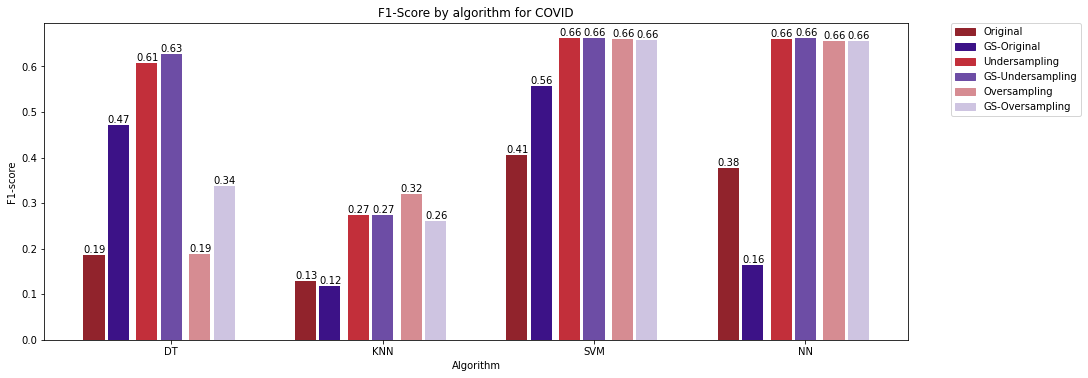

In [106]:
prediction_data = [
    [dtc_classification_report['COVID']['f1-score'], knn_classification_report['COVID']['f1-score'], svc_classification_report['COVID']['f1-score'], mlp_classification_report['COVID']['f1-score']],
    [best_dtc_classification_report['COVID']['f1-score'], best_knn_classification_report['COVID']['f1-score'], best_svc_classification_report['COVID']['f1-score'], best_mlp_classification_report['COVID']['f1-score']],
    [dtc_us_classification_report['COVID']['f1-score'], knn_us_classification_report['COVID']['f1-score'], svc_us_classification_report['COVID']['f1-score'], mlp_us_classification_report['COVID']['f1-score']],
    [best_us_dtc_classification_report['COVID']['f1-score'], best_us_knn_classification_report['COVID']['f1-score'], best_us_svc_classification_report['COVID']['f1-score'], best_us_mlp_classification_report['COVID']['f1-score']],
    [dtc_os_classification_report['COVID']['f1-score'], knn_os_classification_report['COVID']['f1-score'], svc_os_classification_report['COVID']['f1-score'], mlp_os_classification_report['COVID']['f1-score']],
    [best_os_dtc_classification_report['COVID']['f1-score'], best_os_knn_classification_report['COVID']['f1-score'], best_os_svc_classification_report['COVID']['f1-score'], best_os_mlp_classification_report['COVID']['f1-score']],
]

X = np.arange(0,8,2)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1.1])

ax.bar(X, prediction_data[0], color='#91232C', width=0.2)
for i in range(4):
    plt.text(X[i] - 0.1, prediction_data[0][i] + 0.005, f"{prediction_data[0][i]:.2f}")
ax.bar(X + 0.23, prediction_data[1], color='#3C1287', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.13, prediction_data[1][i] + 0.005, f"{prediction_data[1][i]:.2f}")

ax.bar(X + 0.5, prediction_data[2], color='#C22F3A', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.4, prediction_data[2][i] + 0.005, f"{prediction_data[2][i]:.2f}")
ax.bar(X + 0.73, prediction_data[3], color='#6D4DA5', width=0.2, tick_label=['DT', 'KNN', 'SVM', 'NN'])
for i in range(4):
    plt.text(X[i] + 0.63, prediction_data[3][i] + 0.005, f"{prediction_data[3][i]:.2f}")

ax.bar(X + 1, prediction_data[4], color='#D68C92', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.9, prediction_data[4][i] + 0.005, f"{prediction_data[4][i]:.2f}")
ax.bar(X + 1.23, prediction_data[5], color='#CEC4E1', width=0.2)
for i in range(4):
    plt.text(X[i] + 1.13, prediction_data[5][i] + 0.005, f"{prediction_data[5][i]:.2f}")

ax.set_ylim(ymin=0)

original = mpatches.Patch(color='#91232C', label='Original')
best_og = mpatches.Patch(color='#3C1287', label='GS-Original')
undersampled = mpatches.Patch(color='#C22F3A', label='Undersampling')
best_us = mpatches.Patch(color='#6D4DA5', label='GS-Undersampling')
oversampled = mpatches.Patch(color='#D68C92', label='Oversampling')
best_os = mpatches.Patch(color='#CEC4E1', label='GS-Oversampling')
plt.legend(handles=[original, best_og, undersampled, best_us, oversampled, best_os], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("F1-score")
plt.title("F1-Score by algorithm for COVID")

plt.show()

#### Flu Class

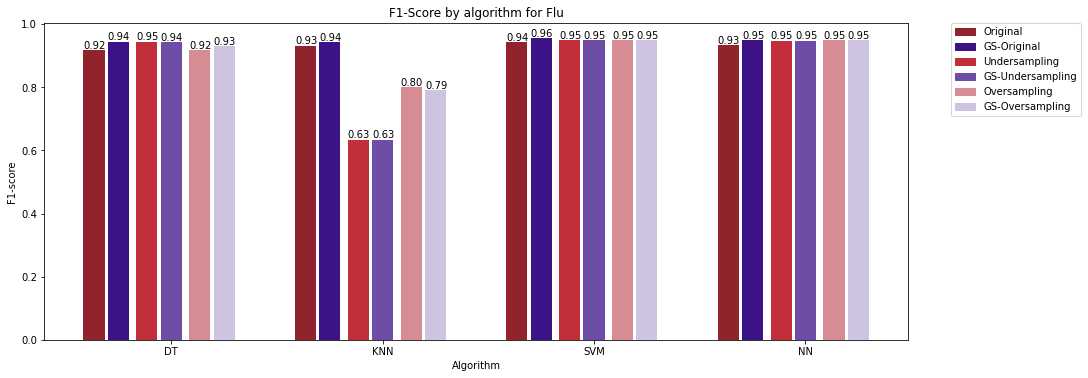

In [107]:
prediction_data = [
    [dtc_classification_report['FLU']['f1-score'], knn_classification_report['FLU']['f1-score'], svc_classification_report['FLU']['f1-score'], mlp_classification_report['FLU']['f1-score']],
    [best_dtc_classification_report['FLU']['f1-score'], best_knn_classification_report['FLU']['f1-score'], best_svc_classification_report['FLU']['f1-score'], best_mlp_classification_report['FLU']['f1-score']],
    [dtc_us_classification_report['FLU']['f1-score'], knn_us_classification_report['FLU']['f1-score'], svc_us_classification_report['FLU']['f1-score'], mlp_us_classification_report['FLU']['f1-score']],
    [best_us_dtc_classification_report['FLU']['f1-score'], best_us_knn_classification_report['FLU']['f1-score'], best_us_svc_classification_report['FLU']['f1-score'], best_us_mlp_classification_report['FLU']['f1-score']],
    [dtc_os_classification_report['FLU']['f1-score'], knn_os_classification_report['FLU']['f1-score'], svc_os_classification_report['FLU']['f1-score'], mlp_os_classification_report['FLU']['f1-score']],
    [best_os_dtc_classification_report['FLU']['f1-score'], best_os_knn_classification_report['FLU']['f1-score'], best_os_svc_classification_report['FLU']['f1-score'], best_os_mlp_classification_report['FLU']['f1-score']],
]

X = np.arange(0,8,2)
fig = plt.figure()
ax = fig.add_axes([0,0,2,1.1])

ax.bar(X, prediction_data[0], color='#91232C', width=0.2)
for i in range(4):
    plt.text(X[i] - 0.1, prediction_data[0][i] + 0.005, f"{prediction_data[0][i]:.2f}")
ax.bar(X + 0.23, prediction_data[1], color='#3C1287', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.13, prediction_data[1][i] + 0.005, f"{prediction_data[1][i]:.2f}")

ax.bar(X + 0.5, prediction_data[2], color='#C22F3A', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.4, prediction_data[2][i] + 0.005, f"{prediction_data[2][i]:.2f}")
ax.bar(X + 0.73, prediction_data[3], color='#6D4DA5', width=0.2, tick_label=['DT', 'KNN', 'SVM', 'NN'])
for i in range(4):
    plt.text(X[i] + 0.63, prediction_data[3][i] + 0.005, f"{prediction_data[3][i]:.2f}")

ax.bar(X + 1, prediction_data[4], color='#D68C92', width=0.2)
for i in range(4):
    plt.text(X[i] + 0.9, prediction_data[4][i] + 0.005, f"{prediction_data[4][i]:.2f}")
ax.bar(X + 1.23, prediction_data[5], color='#CEC4E1', width=0.2)
for i in range(4):
    plt.text(X[i] + 1.13, prediction_data[5][i] + 0.005, f"{prediction_data[5][i]:.2f}")

ax.set_ylim(ymin=0)

original = mpatches.Patch(color='#91232C', label='Original')
best_og = mpatches.Patch(color='#3C1287', label='GS-Original')
undersampled = mpatches.Patch(color='#C22F3A', label='Undersampling')
best_us = mpatches.Patch(color='#6D4DA5', label='GS-Undersampling')
oversampled = mpatches.Patch(color='#D68C92', label='Oversampling')
best_os = mpatches.Patch(color='#CEC4E1', label='GS-Oversampling')
plt.legend(handles=[original, best_og, undersampled, best_us, oversampled, best_os], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.xlabel("Algorithm")
plt.ylabel("F1-score")
plt.title("F1-Score by algorithm for Flu")

plt.show()

## Conclusions

From the graphs we can conclude that:

- All algorithms provide an overall accuracy over 90%, with the notable exception of the K-NN algorithm with the undersampled dataset.
- The overall best performing algorithm was the SVM algorithm, trained on the undersampled dataset.
- Generally, resampling was useful to improve the algorithm's accuracy and recall.
- However, the dataset's imbalance negatively affected the quality of classification for COVID and COLD cases. The best F1-score we were able to get for these algorithms was 66%, compared to 95+% on the other classes.

Overall, we were satisfied by the results we obtained, despite the imbalance negatively affecting results.

This project allowed us to have a deeper understanding of certain algorithms, like SVM, Neural Networks and Decision Trees. Dealing with various algorithms was an eye opening experience as it showed us that some algorithms are not intended to be used in some scenarios, while others are, and perform much better.
In conclusion, this project helped us translate the knowledge gained in the theoretical classes into practice.
Working with a very recent subject was also a good change of pace compared to past projects mainly based on games.